In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import matplotlib as mpl

from local_SE import *

In [2]:
def RBF_vec(x, y, sigma=1):
    return np.exp(-LA.norm(x-y)**2/sigma**2)

In [3]:
def local_eigenvalues(var, d, n=100, m=5):
    
    eigs = np.zeros(n)
    for j in range(10):
        Z = np.zeros((n,d))
        for k in range(d):
            Z[:,k] = np.random.normal(0, var, n)
        P = np.zeros((n,n))
        for i in range(n):
            for j in range(i+1):
                P[i,j] = RBF_vec(Z[i,:],Z[j,:], 1)
                P[j,i] = P[i,j]
        eigs = eigs + LA.eigvalsh(P)[::-1]
    eigs = eigs/10
    return(eigs[0:m])
    

In [4]:
concentration = np.array([1, 0.5, 0.2, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01])

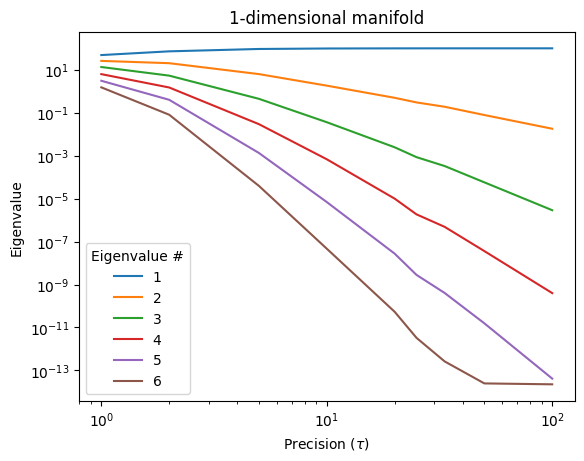

In [5]:
#d=1
eigvals_1 = np.zeros((len(concentration), 6))
for i in range(len(concentration)):
    eigvals_1[i,:] = local_eigenvalues(concentration[i], d=1, m=6)


plt.title('1-dimensional manifold')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Precision ($\tau$)')
plt.ylabel('Eigenvalue')
for i in range(6):
    plt.plot(1/concentration, eigvals_1[:,i], label= i+1)
plt.legend(title='Eigenvalue #')

plt.show()
    

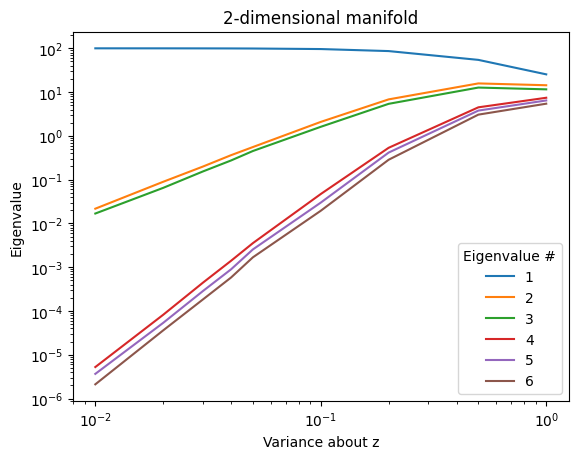

In [6]:
#d=2

eigvals_2 = np.zeros((len(concentration), 6))
for i in range(len(concentration)):
    eigvals_2[i,:] = local_eigenvalues(concentration[i], d=2, m=6)

plt.title('2-dimensional manifold')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance about z')
plt.ylabel('Eigenvalue')
# plt.legend(['2,3,4,5,6'], loc='lower right')
for i in range(6):
    plt.plot(concentration, eigvals_2[:,i], label= i+1)
plt.legend(title='Eigenvalue #')



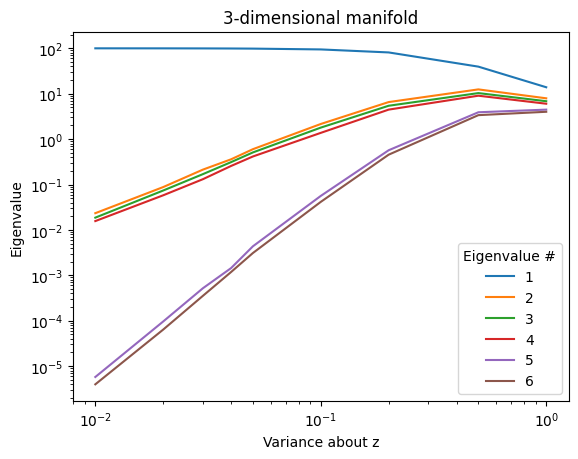

In [7]:
#d=3
eigvals_3 = np.zeros((len(concentration), 6))
for i in range(len(concentration)):
    eigvals_3[i,:] = local_eigenvalues(concentration[i], d=3, m=6)

%matplotlib inline
plt.title('3-dimensional manifold')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance about z')
plt.ylabel('Eigenvalue')
for i in range(6):
    plt.plot(concentration, eigvals_3[:,i], label= i+1)
plt.legend(title='Eigenvalue #')

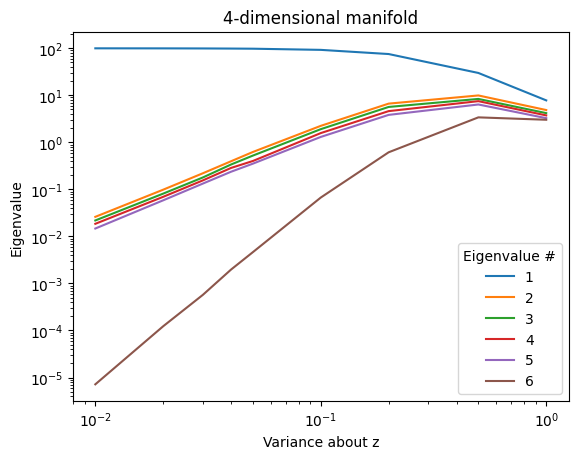

In [8]:
#d=4
eigvals_4 = np.zeros((len(concentration), 6))
for i in range(len(concentration)):
    eigvals_4[i,:] = local_eigenvalues(concentration[i], d=4, m=6)

plt.title('4-dimensional manifold')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance about z')
plt.ylabel('Eigenvalue')
for i in range(6):
    plt.plot(concentration, eigvals_4[:,i], label= i+1)
plt.legend(title='Eigenvalue #')

In [9]:
mpl.rcParams.update({'font.size': 14})  # Set the font size globally

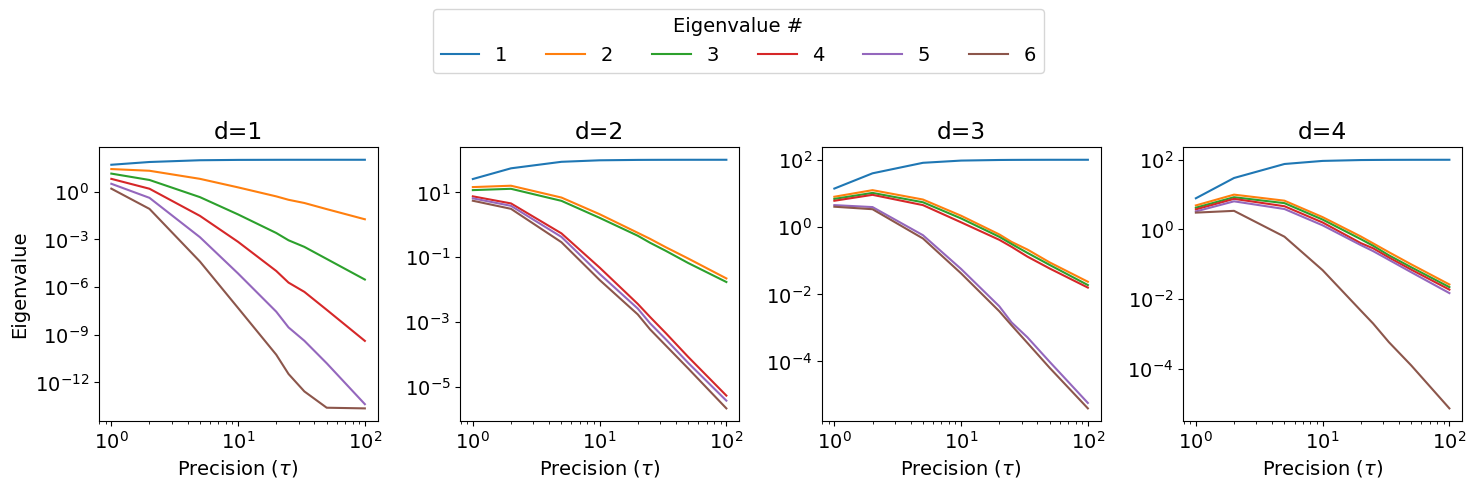

In [ ]:
%matplotlib inline

fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot for eigvals_1
for i in range(6):
    axs[0].plot(1/concentration, eigvals_1[:, i], label=i + 1)
axs[0].set_title('d=1')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'Precision ($\tau$)')
axs[0].set_ylabel('Eigenvalue')

# Plot for eigvals_2
for i in range(6):
    axs[1].plot(1/concentration, eigvals_2[:, i], label=i + 1)
axs[1].set_title('d=2')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'Precision ($\tau$)')

# Plot for eigvals_3
for i in range(6):
    axs[2].plot(1/concentration, eigvals_3[:, i], label=i + 1)
axs[2].set_title('d=3')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'Precision ($\tau$)')

# Plot for eigvals_4
for i in range(6):
    axs[3].plot(1/concentration, eigvals_4[:, i], label=i + 1)
axs[3].set_title('d=4')
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel(r'Precision ($\tau$)')

# Add a single legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Eigenvalue #', loc='upper center', ncol=6)

plt.tight_layout(rect=[0, 0, 1, 0.8])  # Adjust layout to make space for the legend
